<a href="https://colab.research.google.com/github/AkankshaNarula/ML/blob/main/WEMLHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Plotting the 2D and 3D representations

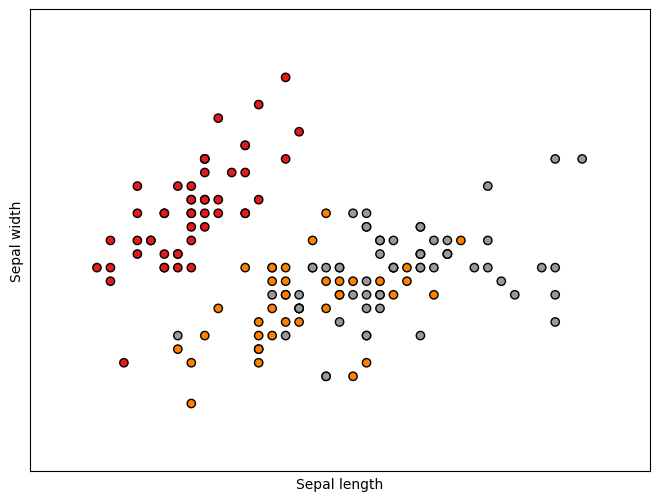

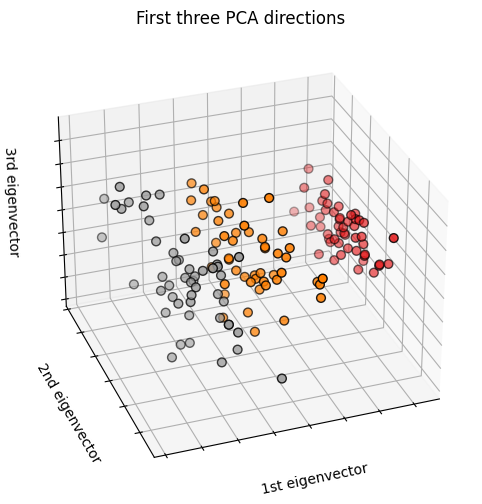

In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

#Classify into two classes using KNN

Loading Iris for KNN binary classification

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

Splitting into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Classify into two classes (class 0 and class 1)

In [ ]:
y_train_binary = np.where((y_train == 0) | (y_train == 1), y_train, -1)
y_test_binary = np.where((y_test == 0) | (y_test == 1), y_test, -1)

Filter out the data points for class 0 and class 1 in the training set

In [ ]:
X_train_binary = X_train[(y_train_binary != -1)]
y_train_binary = y_train_binary[(y_train_binary != -1)]

 Filter out the data points for class 0 and class 1 in the testing set

In [ ]:
X_test_binary = X_test[(y_test_binary != -1)]
y_test_binary = y_test_binary[(y_test_binary != -1)]

Implementing KNN

In [ ]:
knn_binary = KNeighborsClassifier(n_neighbors=3)
knn_binary.fit(X_train, y_train_binary)
y_pred_binary = knn_binary.predict(X_test)

Calculating Accuracy

In [ ]:
accuracy_binary = np.sum(y_pred_binary == y_test_binary) / len(y_test_binary)
print("Accuracy for Two-class Classification:", accuracy_binary)

Accuracy for Two-class Classification: 1.0


Plotting k v/s Accuracy curve

In [ ]:
accuracy_list_binary = []
k_values = range(1, len(X_train) + 1)
for k in k_values:
    knn_binary = KNeighborsClassifier(n_neighbors=k)
    knn_binary.fit(X_train, y_train_binary)
    y_pred_binary = knn_binary.predict(X_test)
    accuracy_binary = np.sum(y_pred_binary == y_test_binary) / len(y_test_binary)
    accuracy_list_binary.append(accuracy_binary)

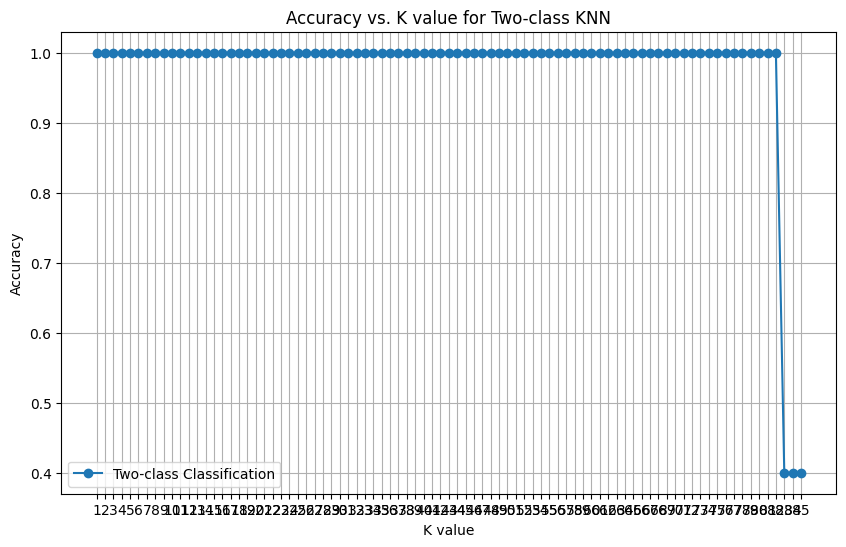

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_list_binary, label='Two-class Classification', marker='o')
plt.title('Accuracy vs. K value for Two-class KNN')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

#Classify into 3 classes using KNN

Loading KNN

---



In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Load the Iris dataset

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

 Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [ ]:
knn_multi = KNeighborsClassifier(n_neighbors=2)
knn_multi.fit(X_train, y_train)
y_pred_multi = knn_multi.predict(X_test)

Calcultaing Accuracy

In [ ]:
accuracy_multi = np.sum(y_pred_multi == y_test) / len(y_test)
print("Accuracy for Three-class Classification:", accuracy_multi)

Accuracy for Three-class Classification: 0.9565217391304348


Plotting k-value v/s accuracy graph

In [ ]:
accuracy_list_multi = []
k_values = range(1, len(X_train) + 1)
for k in k_values:
    knn_multi = KNeighborsClassifier(n_neighbors=k)
    knn_multi.fit(X_train, y_train)
    y_pred_multi = knn_multi.predict(X_test)
    accuracy_multi = np.sum(y_pred_multi == y_test) / len(y_test)
    accuracy_list_multi.append(accuracy_multi)

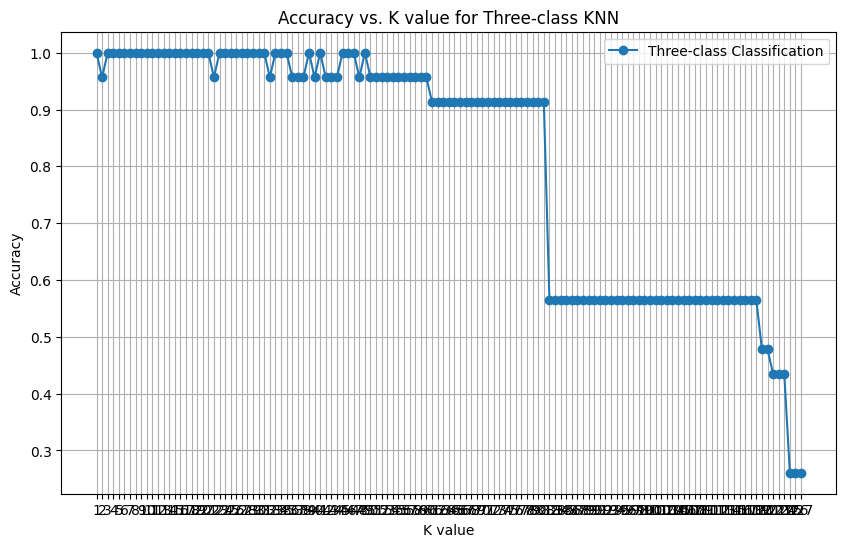

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_list_multi, label='Three-class Classification', marker='o')
plt.title('Accuracy vs. K value for Three-class KNN')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

#Classify into two classes using Linear Classification


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Loading Iris Dataset

In [ ]:
iris = load_iris()

Select only two samples belonging to class 0 and 1

---



In [ ]:
X = iris.data[iris.target < 2]
y = iris.target[iris.target < 2]

Splitting the data into training and testing datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Iniatalizing a linear classifier (logistic regression in this case) and training it

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

Creating 3-D plot

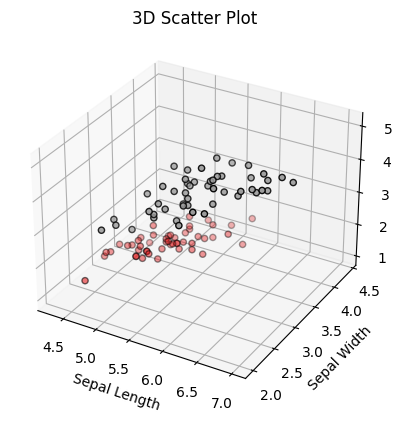

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D Scatter Plot')
plt.show()


 Print the number of training and test samples

In [ ]:
print("Number of training samples:", len(X_train))
print("Number of test samples:", len(X_test))

Number of training samples: 85
Number of test samples: 15


Make predictions on the test set

In [ ]:
y_pred = clf.predict(X_test)


Calculate and print the accuracy score

In [ ]:
print("Accuracy Score =", accuracy_score(y_test, y_pred))

Accuracy Score = 1.0


Classifying into class 1 and class 2

---



In [ ]:
X_1_2 = iris.data[iris.target != 0]
y_1_2 = iris.target[iris.target != 0]
y_1_2 = np.where(y_1_2 == 1, 0, 1)
X_train_1_2, X_test_1_2, y_train_1_2, y_test_1_2 = train_test_split(X_1_2, y_1_2, test_size=0.15, random_state=42)
clf_1_2 = LogisticRegression()
clf_1_2.fit(X_train_1_2, y_train_1_2)
y_pred_1_2 = clf_1_2.predict(X_test_1_2)
print("Accuracy Score (Class 1 vs. Class 2) =", accuracy_score(y_test_1_2, y_pred_1_2))

Accuracy Score (Class 1 vs. Class 2) = 0.9333333333333333


Classifying into class 2 and class 0

---



In [ ]:
X_2_0 = iris.data[iris.target != 1]
y_2_0 = iris.target[iris.target != 1]
y_2_0 = np.where(y_2_0 == 2, 0, 1)
X_train_2_0, X_test_2_0, y_train_2_0, y_test_2_0 = train_test_split(X_2_0, y_2_0, test_size=0.15, random_state=42)
clf_2_0 = LogisticRegression()
clf_2_0.fit(X_train_2_0, y_train_2_0)
y_pred_2_0 = clf_2_0.predict(X_test_2_0)
print("Accuracy Score (Class 2 vs. Class 0) =", accuracy_score(y_test_2_0, y_pred_2_0))

Accuracy Score (Class 2 vs. Class 0) = 1.0
